In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback
import matplotlib.pyplot as plt

In [0]:
bs=32

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
np.random.seed(2)

In [0]:
def get_data(sz):
  data=ImageDataBunch.from_folder('/content/drive/My Drive/Wet_Dry_Classifier_Dataset',train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=sz,bs=bs).normalize(imagenet_stats)
  return data

In [0]:
learner_64= cnn_learner(get_data(64), models.resnet152, metrics=accuracy).to_fp16().mixup()

In [0]:
learner_64.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_64,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,1.101214,2.272475,0.781646,01:41
1,1.019584,2.378515,0.775316,01:38
2,0.877551,7.830403,0.806962,01:37
3,0.703295,0.507604,0.841772,01:38
4,0.611919,0.343241,0.854430,01:36
5,0.550333,0.378397,0.873418,01:37
6,0.533248,1.656133,0.873418,01:36
7,0.493032,0.359393,0.863924,01:37
8,0.474010,0.818002,0.867089,01:37


Better model found at epoch 0 with accuracy value: 0.7816455960273743.
Better model found at epoch 2 with accuracy value: 0.8069620132446289.
Better model found at epoch 3 with accuracy value: 0.8417721390724182.
Better model found at epoch 4 with accuracy value: 0.8544303774833679.
Better model found at epoch 5 with accuracy value: 0.8734177350997925.


In [0]:
learner_128= cnn_learner(get_data(128), models.resnet152, metrics=accuracy).to_fp16().mixup()

In [0]:
learner_128.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/newset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
dry,wet,dry,wet,dry
Path: /content/drive/My Drive/newset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [0]:
learner_128.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_128,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.474733,0.274520,0.876582,01:47
1,0.471921,0.472822,0.860759,01:44
2,0.467955,0.256894,0.905063,01:43
3,0.445440,0.269309,0.892405,01:45
4,0.429208,0.342190,0.882911,01:45
5,0.413030,0.250390,0.895570,01:45
6,0.392639,0.200743,0.914557,01:45
7,0.383055,0.247757,0.895570,01:45
8,0.367133,0.215737,0.914557,01:45


Better model found at epoch 0 with accuracy value: 0.8765822649002075.
Better model found at epoch 2 with accuracy value: 0.905063271522522.
Better model found at epoch 6 with accuracy value: 0.9145569801330566.


In [0]:
learner_224= cnn_learner(get_data(224), models.resnet152, metrics=accuracy).to_fp16().mixup()

In [0]:
learner_224.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/newset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dry,dry,wet,dry,wet
Path: /content/drive/My Drive/newset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [0]:
learner_224.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_224,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.388403,0.168851,0.949367,02:11
1,0.372760,0.173910,0.946203,02:07
2,0.384333,0.224233,0.924051,02:08
3,0.387838,0.184545,0.946203,02:08
4,0.379159,0.173356,0.930380,02:08
5,0.358590,0.142292,0.952532,02:08
6,0.332636,0.150178,0.946203,02:09
7,0.327913,0.143331,0.958861,02:09
8,0.321108,0.150312,0.952532,02:09


Better model found at epoch 0 with accuracy value: 0.949367105960846.
Better model found at epoch 5 with accuracy value: 0.952531635761261.
Better model found at epoch 7 with accuracy value: 0.9588607549667358.


In [10]:
learner_256= cnn_learner(get_data(256), models.resnet152, metrics=accuracy).to_fp16().mixup()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:04<00:00, 51.8MB/s]


In [11]:
learner_256.load('RESULTANT_MODEL')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
wet,wet,wet,dry,wet
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1

In [0]:
learner_256.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_256,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.326632,0.078712,0.990506,02:25
1,0.319644,0.115606,0.971519,02:20
2,0.329818,0.087696,0.968354,02:19
3,0.340614,0.117553,0.968354,02:19
4,0.341506,0.111951,0.962025,02:18
5,0.322299,0.111493,0.958861,02:19
6,0.309660,0.098885,0.974684,02:19
7,0.310023,0.094497,0.977848,02:20
8,0.304967,0.120642,0.955696,02:18


Better model found at epoch 0 with accuracy value: 0.9905063509941101.


In [12]:
interp = ClassificationInterpretation.from_learner(learner_256)

losses,idxs = interp.top_losses()

len(get_data(256).valid_ds)==len(losses)==len(idxs)

True

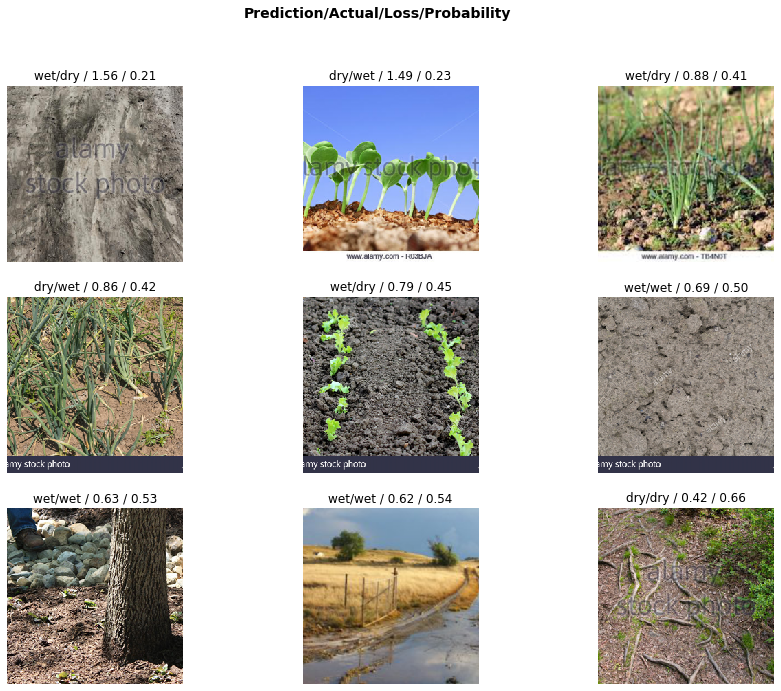

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
doc(interp.plot_top_losses)

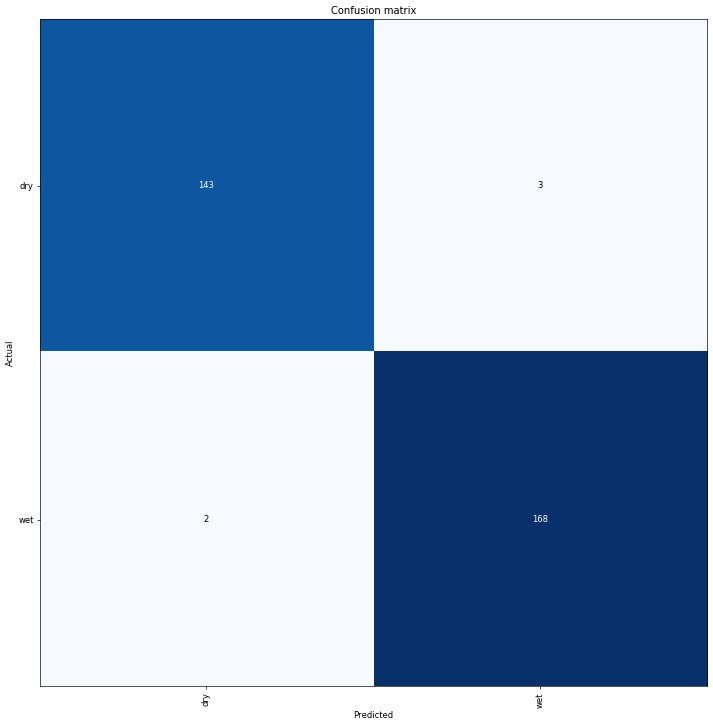

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)